In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Lorenz model (4 points)

Create the 3D phase portrait of the Lorenz model and show sensitive dependence on initial conditions.

In [4]:
initial_conditions = np.array([np.array([1, 1, 1]), np.array([1 + 1e-5, 1, 1])])

sigma = 10
rho = 28
beta = 2.66

def f(x, y, z):
    return np.array([sigma * (y - x), rho * x - y - x * z, x * y - beta * z])

In [5]:
interval = 1000
dt = 0.01

def simulate(initial_condition):
    points = [initial_condition]
    for _ in range(int(interval / dt)):
        points.append(points[-1] + f(*points[-1]) * dt)
    return points

values = [simulate(init) for init in initial_conditions]

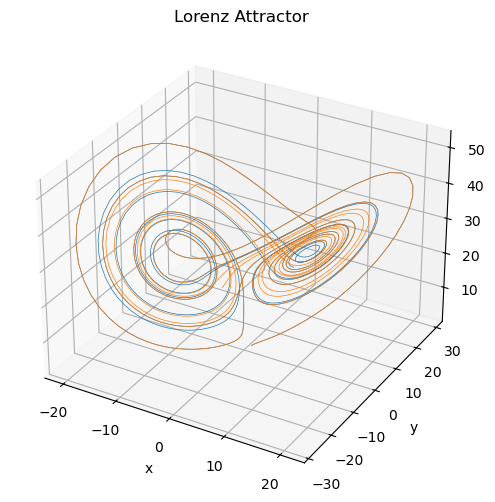

In [6]:
ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')

# only plot data after 15 seconds
for points in values:
    points = np.array(points)[:int(15 / dt)]
    ax.plot(*points.T, lw=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Lorenz Attractor")

plt.savefig('lorenz.png')
plt.show()

### Bifurcation diagram (2 points)

Create the bifurcation diagram of the logistic map

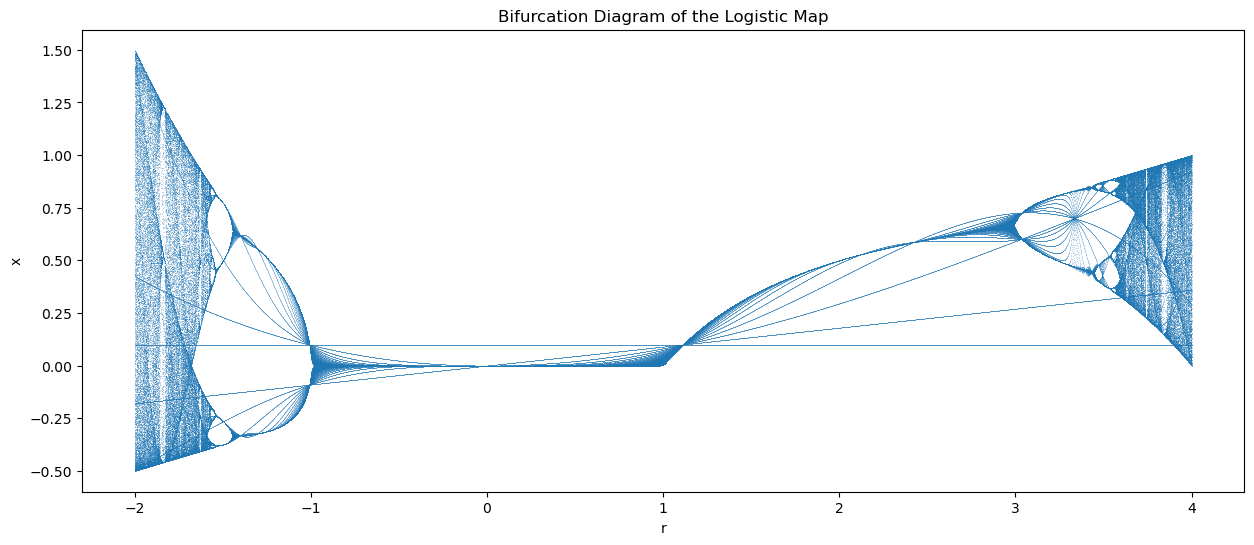

In [7]:
steps = 10000
k = 200

r_range = [-2, 4]
r_steps = 5000

x_init = 0.1

r_space = np.linspace(*r_range, r_steps)
xss = []

for r in r_space:
    xs = [x_init]
    for _ in range(steps):
        xs.append(r * xs[-1] * (1 - xs[-1]))
    xss.append(xs[:k])

plt.figure(figsize=(15, 6))
plt.scatter([[r] * k for r in r_space], xss, s=0.1, linewidths=0)

plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation Diagram of the Logistic Map')

plt.savefig('bifurcation.png')
plt.show()

### Numerical simulation of the forced damped pendulum (3 points)

Simulate the forced damped pendulum and show it position over time for a sinusoidal input at different driving frequencies.

In [8]:
g = 9.8    # gravity
l = 1      # length of rod
c = 0.5    # damping coefficient
m = 1      # mass
w = 5      # driving frequency

gamma = c / m
omega = g / l

x_init = np.array([0, 1])  # position, velocity

def u(t):
    return np.sin(w * t)

def f(x1, x2, t):
    return np.array([x2, -omega**2 * np.sin(x1) - gamma * x2 + u(t)])

In [9]:
dt = 0.0001

ts = np.arange(0, 10, dt)
xs = [x_init]

for t in ts:
    xs.append(xs[-1] + dt * f(*xs[-1], t))

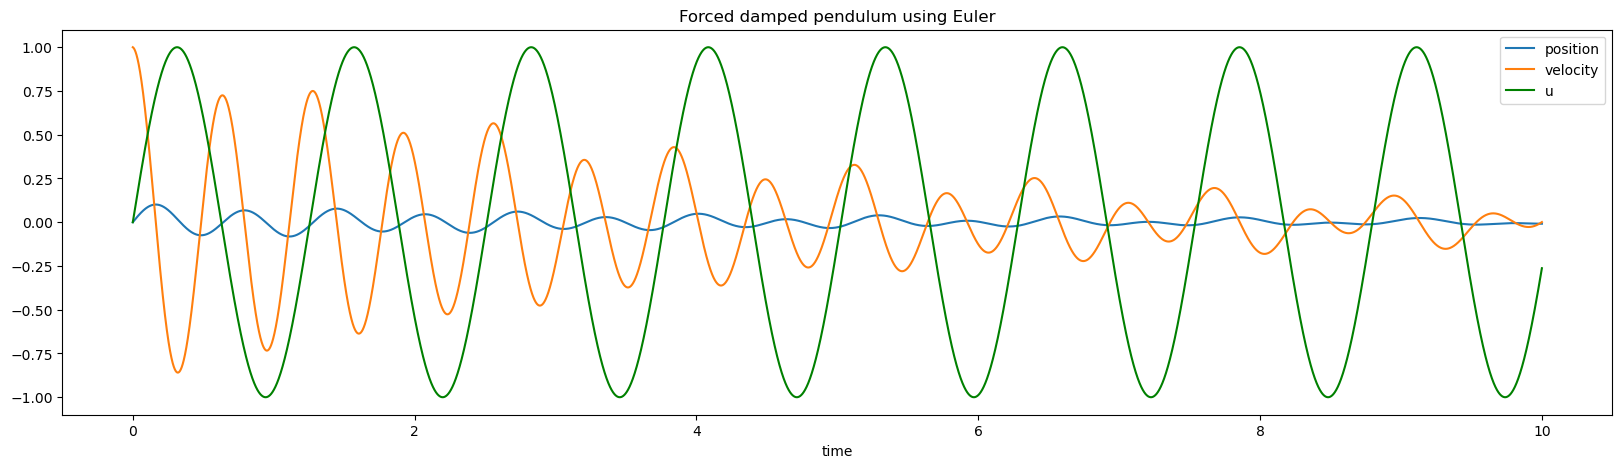

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
xs = np.array(xs)

# plot the dynamical system equations
for i in range(len(xs[0])):
    ax.plot(ts, xs[:-1, i])

ax.plot(ts, list(map(u, ts)), color='green')

ax.legend(['position', 'velocity', 'u'])
ax.set_xlabel("time")

plt.title('Forced damped pendulum using Euler')

plt.savefig('pendulum.png')
plt.show()